### 1. Cài đặt thư viện

In [3]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### 2. Khai báo thư viện

Một số thư viện cần thiết cho model:
-   numpy cho xử lý số học
-   pandas cho xử lý và phân tích dữ liệu dạng bảng
-   matplotlib cho xử lý biểu diễn dữ liệu trên đồ họa
-   wordclout cho phân tích văn bản và trực quan hóa từ khóa chính
-   nltk cho tiền xử lý văn bản
    - stopwords: danh sách các từ stopwords
    - punkt: mô hình tokenizer cho phân chia câu, từ trong văn bản

In [ ]:
import numpy as np        # For numerical operations
import pandas as pd       # For data manipulation and analysis
import matplotlib.pyplot as plt  # For data visualization
%matplotlib inline

# Importing WordCloud for text visualization
from wordcloud import WordCloud

# Importing NLTK for natural language processing
import nltk
from nltk.corpus import stopwords    # For stopwords


# Downloading NLTK data
nltk.download('stopwords')   # Downloading stopwords data
nltk.download('punkt')       # Downloading tokenizer data

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jayce\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jayce\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### 3. Đọc dữ liệu

In [10]:
df = pd.read_csv('spam.csv', encoding='latin1')

In [11]:
styled_df = df.head()
styled_df = styled_df.style.set_table_styles([
    {"selector": "th", "props": [("color", 'white'), ("background-color", "#4CAF50")]}
])
styled_df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",nan,nan,nan
1,ham,Ok lar... Joking wif u oni...,nan,nan,nan
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,nan,nan,nan
3,ham,U dun say so early hor... U c already then say...,nan,nan,nan
4,ham,"Nah I don't think he goes to usf, he lives around here though",nan,nan,nan


### 4 Xử lý dữ liệu đầu vào

#### 4.1 Thông tin về dữ liệu

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


Dữ liệu gồm 5572 dòng, 5 cột. Trong đó gồm 2 cột chính (v1, v2) chứa đầy đủ dữ liệu

#### 4.2 Xử lý các cột thừa

Tiến hành drop các cột không cần thiết (Unnamed)

In [13]:
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [14]:
styled_df = df.head(5).style

styled_df.set_table_styles([
    {"selector": "th", "props": [("color", 'White'), ("background-color", "#4CAF50"), ('font-weight', 'bold')]}
])


,v1,v2
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


#### 4.3 Đổi lại tên các cột

In [15]:
df.rename(columns = {'v1': 'target', 'v2': 'text'}, inplace = True)

#### 4.4 Mã hóa nhãn

Mục đích là chuyển các cột target từ chuỗi thành số (0/1)

In [16]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

In [17]:
styled_df = df.head().style

styled_df.set_table_styles([
    {"selector": "th", "props": [("color", 'White'), ("background-color", "#4CAF50"), ('font-weight', 'bold')]}
])


,target,text
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives around here though"


#### 4.5 Kiểm tra dữ liệu bị thiếu

In [18]:
#checking missing values
df.isnull().sum()

target    0
text      0
dtype: int64

#### 4.6 Kiểm tra dữ liệu bị trùng lặp

In [19]:
#check duplicate values
df.duplicated().sum()

np.int64(403)

#### 4.7 Xóa dữ liệu bị trùng lặp

In [20]:
#remove Duplicate
df = df.drop_duplicates(keep = 'first')

#### 4.8 Kiểm tra kích thước của tệp

In [21]:
df.shape

(5169, 2)

Sau khi loại bỏ dữ liệu trùng lặp, tệp dữ liệu còn lại 5169 hàng, 2 cột

## 5 Trực quan hóa dữ liệu (Exploratory Data Analysis)

#### 5.1 Tỷ lệ giữa ham/spam

In [23]:
values = df['target'].value_counts()
total = values.sum()

percentage_0 = (values[0] /total) * 100
percentage_1 = (values[1]/ total) *100

print('percentage of 0 :' ,percentage_0)
print('percentage of 1 :' ,percentage_1)

percentage of 0 : 87.3669955503966
percentage of 1 : 12.633004449603405


87.36% là tin nhắn bình thường (ham) <br>
12.63% là tin nhắn spam

Biểu diễn tỷ lệ spam/ham lên biểu đồ tròn

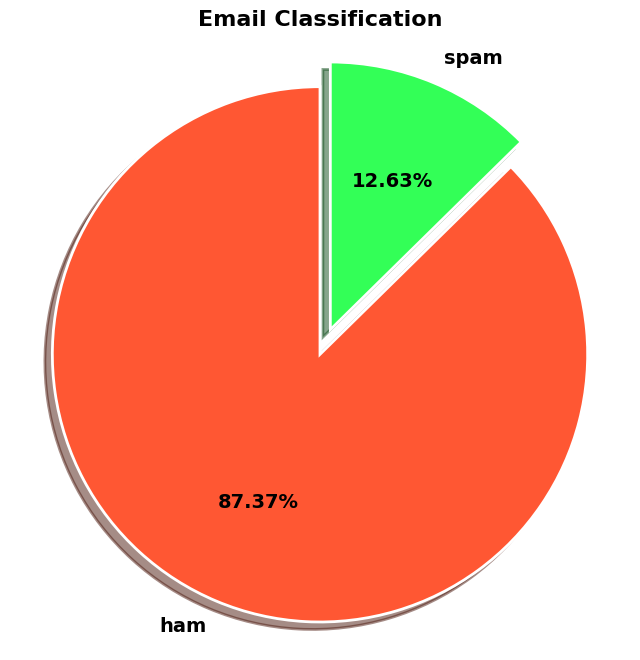

In [24]:
import matplotlib.pyplot as plt

colors = ['#FF5733', '#33FF57']

# Define the explode parameter to create a gap between slices
explode = (0, 0.1)  # Explode the second slice (spam) by 10%

# Create a figure with a white background
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_facecolor('white')

# Create the pie chart with custom colors, labels, explode parameter, and shadow
wedges, texts, autotexts = ax.pie(
    values, labels=['ham', 'spam'],
    autopct='%0.2f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'linewidth': 2, 'edgecolor': 'white'},
    explode=explode,  # Apply the explode parameter
    shadow=True  # Add shadow
)

# Customize text properties
for text, autotext in zip(texts, autotexts):
    text.set(size=14, weight='bold')
    autotext.set(size=14, weight='bold')

# Add a title
ax.set_title('Email Classification', fontsize=16, fontweight='bold')

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Show the pie chart
plt.show()


#### 5.2 Phân tích độ dài & cấu trúc văn bản

Tạo ra các cột 
- num_characters: Tính số ký tự trong mỗi tin nhắn (bao gồm cả khoảng trắng và dấu câu)
- num_words: Tính số từ trong mỗi tin nhắn
- num_sentence: Tính số câu trong mỗi tin nhắn

In [25]:
df['num_characters'] = df['text'].apply(len)
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df['num_sentence'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [26]:
df[['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


#### 5.3 Thống kê mô tả cho tin nhắn hợp lệ (ham)

In [27]:
#ham
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


#### 5.4 Thống kê mô tả cho tin nhắn spam

In [28]:
#spam
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


#### 5.5 Biểu đồ phân phối (histogram)

Vẽ biểu đồ phân phối (histogram) về số lượng ký tự (num_characters) trong các tin nhắn spam/ham

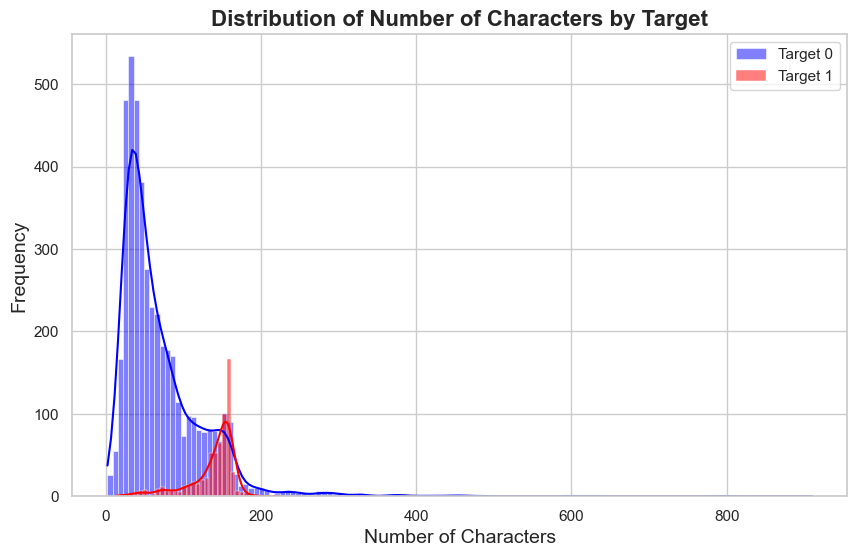

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid')  # Add a white grid background

# Create a figure and set the figure size
plt.figure(figsize=(10, 6))

# Plot the histogram for target 0 in blue
sns.histplot(df[df['target'] == 0]['num_characters'], color='blue', label='Target 0', kde=True)

# Plot the histogram for target 1 in red
sns.histplot(df[df['target'] == 1]['num_characters'], color='red', label='Target 1', kde=True)

# Add labels and a title
plt.xlabel('Number of Characters', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Number of Characters by Target', fontsize=16, fontweight='bold')

# Add a legend
plt.legend()

# Customize the appearance of the plot

# Show the plot
plt.show()


Biểu đồ phân phối cho số lượng từ (num_words)

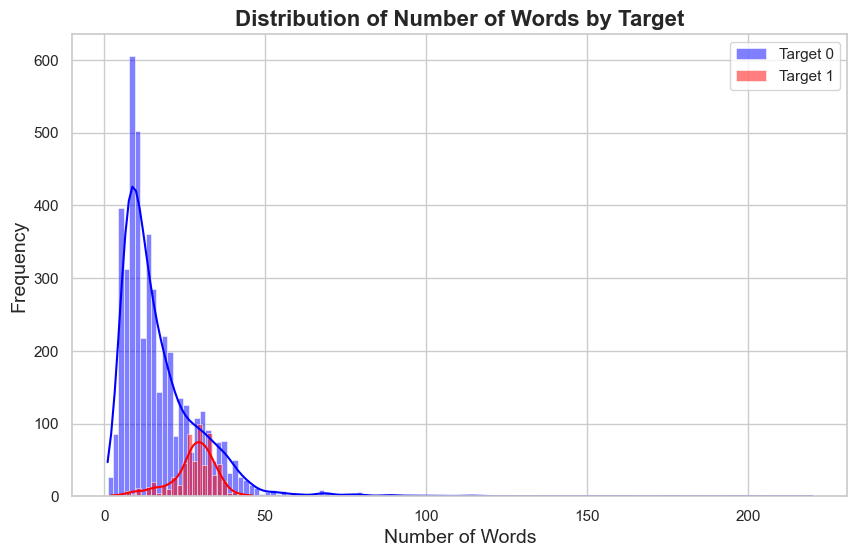

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Customize the appearance of the plot
sns.set(style='whitegrid')  # Add a white grid background

# Create a figure and set the figure size
plt.figure(figsize=(10, 6))

# Plot the histogram for target 0 in blue
sns.histplot(df[df['target'] == 0]['num_words'], color='blue', label='Target 0', kde=True)

# Plot the histogram for target 1 in red
sns.histplot(df[df['target'] == 1]['num_words'], color='red', label='Target 1', kde=True)

# Add labels and a title
plt.xlabel('Number of Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Number of Words by Target', fontsize=16, fontweight='bold')

# Add a legend
plt.legend()

# Show the plot
plt.show()

#### 5.6 Biểu đồ cặp

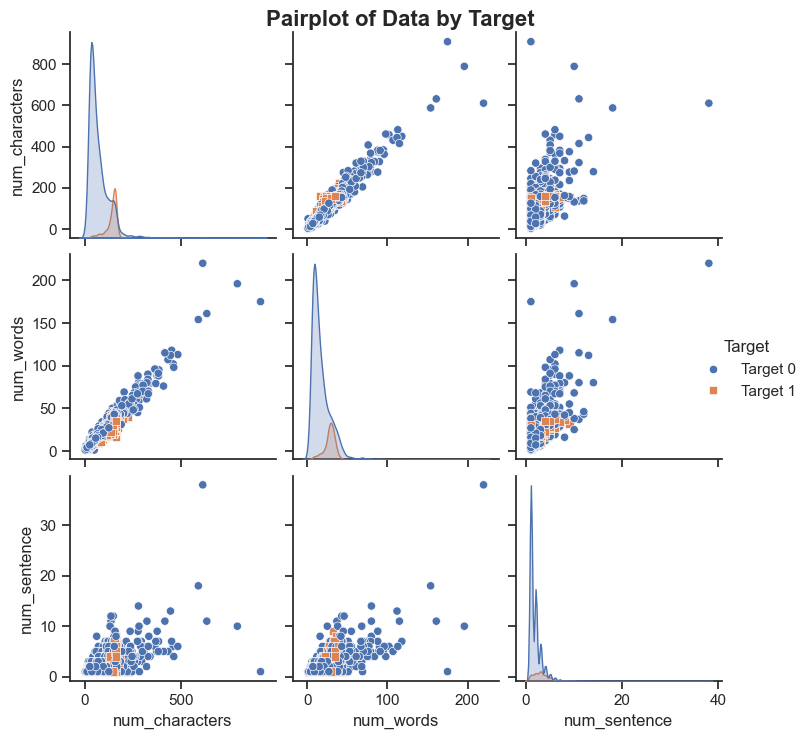

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pairplot with custom styling
sns.set(style='ticks', color_codes=True)
g = sns.pairplot(df, hue='target', diag_kind='kde', markers=["o", "s"])

# Set a title for the pairplot
g.fig.suptitle("Pairplot of Data by Target", fontsize=16, fontweight='bold')
plt.subplots_adjust(top=0.95)  # Adjust the position of the title

# Customize the legend
g._legend.set_title('Target')
for t, l in zip(g._legend.texts, ["Target 0", "Target 1"]):
    t.set_text(l)

# Show the pairplot
plt.show()


* Một số điểm ngoại lại thuộc target 0 (ham)
    - Làm mô hình học lệch nếu không được xử lý
    - Dễ gây ra overfitting

Sử dụng thống kê (Z-score)

In [47]:
from scipy import stats
df = df[(np.abs(stats.zscore(df[['num_characters', 'num_words', 'num_sentence']])) < 3).all(axis=1)]


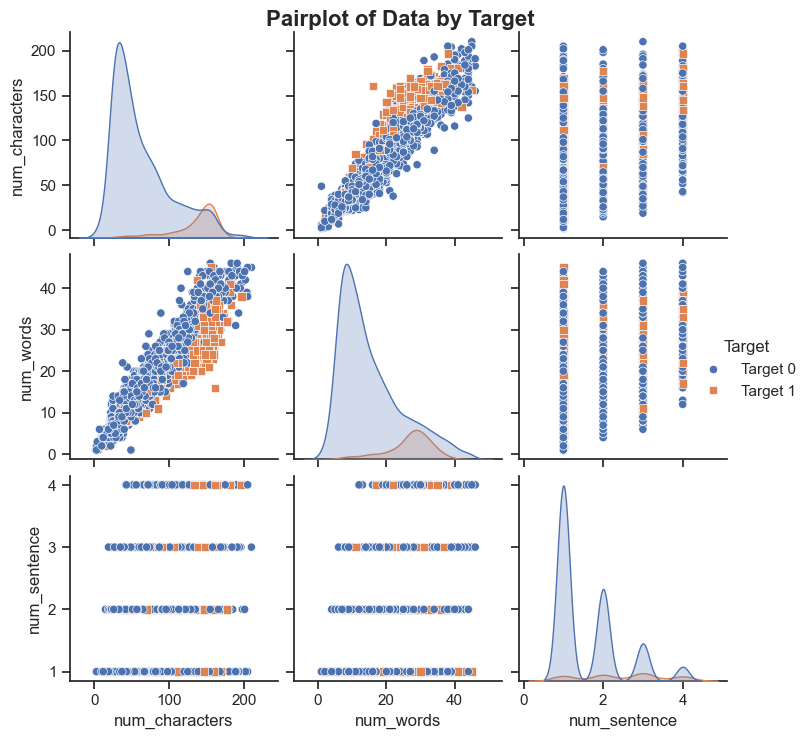

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pairplot with custom styling
sns.set(style='ticks', color_codes=True)
g = sns.pairplot(df, hue='target', diag_kind='kde', markers=["o", "s"])

# Set a title for the pairplot
g.fig.suptitle("Pairplot of Data by Target", fontsize=16, fontweight='bold')
plt.subplots_adjust(top=0.95)  # Adjust the position of the title

# Customize the legend
g._legend.set_title('Target')
for t, l in zip(g._legend.texts, ["Target 0", "Target 1"]):
    t.set_text(l)

# Show the pairplot
plt.show()

* Kết quả sau khi xử lý ngoại lai:
    - Giá trị cực đại đã được thu hẹp
    - Dữ liệu cân bằng hơn
    - Tương quan vẫn được giữ lại

#### 5.7 Ma trận tương quan

In [49]:
df[['target','num_characters', 'num_words', 'num_sentence']].corr()

,target,num_characters,num_words,num_sentence
target,1.000000,0.506179,0.371854,0.309014
num_characters,0.506179,1.000000,0.957446,0.542761
num_words,0.371854,0.957446,1.000000,0.571001
num_sentence,0.309014,0.542761,0.571001,1.000000


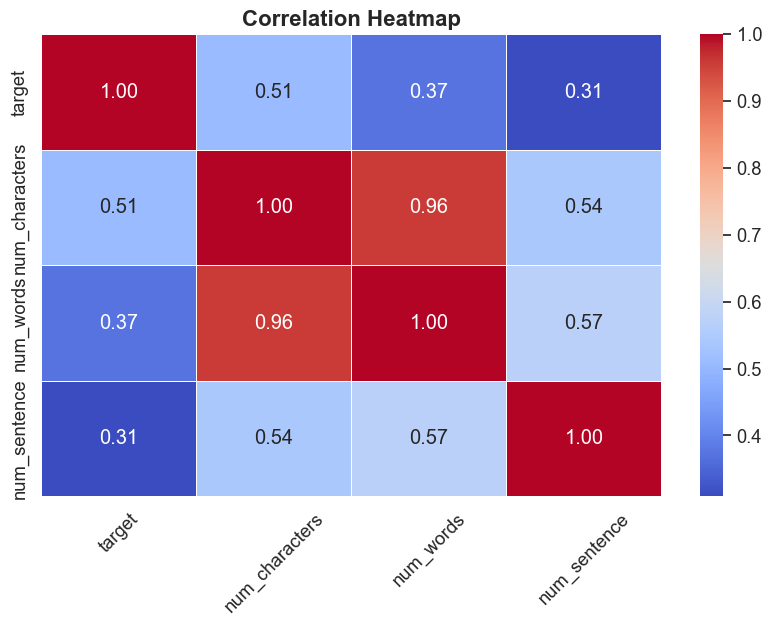

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns for the correlation matrix
correlation_matrix = df[['target', 'num_characters', 'num_words', 'num_sentence']].corr()

# Create a heatmap with custom styling
plt.figure(figsize=(10, 6))
sns.set(font_scale=1.2)  # Adjust font scale for better readability
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")

# Set a title for the heatmap
plt.title("Correlation Heatmap", fontsize=16, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the heatmap
plt.show()


* Tương quan mạnh đối với num_words và num_charaters (Văn bản có nhiều ký tự thì có nhiều từ)
* 


### 6. Tiền xử lý dữ liệu

* Tiền xử lý văn bản
    - Chuyển văn bản về chữ thường
    - Tách từ (Tokenization)
    - Loại bỏ ký tự đặc biệt, giữ lại từ có chữ hoặc số
    - Loại bỏ stop words và dấu câu
    - Stemming – rút gọn từ về gốc

In [51]:
# Importing the Porter Stemmer for text stemming
from nltk.stem.porter import PorterStemmer

# Importing the string module for handling special characters
import string

# Creating an instance of the Porter Stemmer
ps = PorterStemmer()

# Lowercase transformation and text preprocessing function
def transform_text(text):
    # Transform the text to lowercase
    text = text.lower()
    
    # Tokenization using NLTK
    text = nltk.word_tokenize(text)
    
    # Removing special characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    # Removing stop words and punctuation
    text = y[:]
    y.clear()
    
    # Loop through the tokens and remove stopwords and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
        
    # Stemming using Porter Stemmer
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    
    # Join the processed tokens back into a single string
    return " ".join(y)


In [52]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

#### 6.1 Tạo ra cột mới 'transformed_text'

Lưu kết quả sau khi tiền xử lý văn bản

In [54]:
df['transformed_text'] = df['text'].apply(transform_text)

In [55]:
styled_df = df.head(5).style


# Modify the color and background color of the table headers (th)
styled_df.set_table_styles([
    {"selector": "th", "props": [("color", 'White'), ("background-color", "#4CAF50"), ('font-weight', 'bold')]}
])


,target,text,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",111,24,2,go jurong point crazi avail bugi n great world la e buffet cine got amor wat
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,155,37,2,free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives around here though",61,15,1,nah think goe usf live around though


#### 6.2 Tạo Word Cloud

Tạo Word Cloud cho tin nhắn Spam

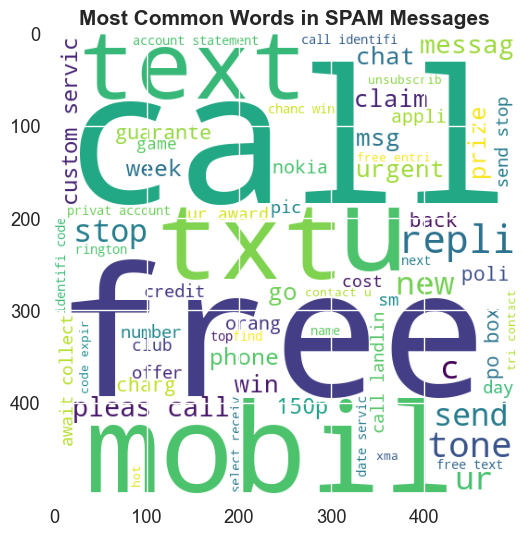

In [56]:
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize = (15,6))
plt.imshow(spam_wc)
plt.title("Most Common Words in SPAM Messages", fontsize=15, fontweight='bold')
plt.show()

Tạo Word Cloud cho tin nhắn Ham

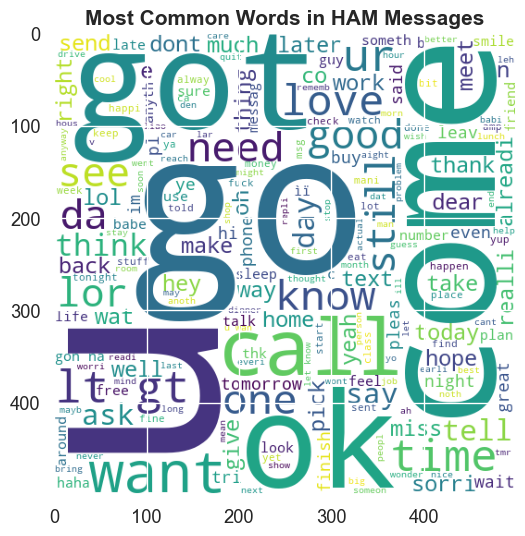

In [57]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize = (15,6))
plt.imshow(ham_wc)
plt.title("Most Common Words in HAM Messages", fontsize=15, fontweight='bold')
plt.show()

6.3 Biểu diễn các từ phổ biến

Top30 từ phổ biến thuộc nhóm spam

In [58]:
spam_carpos = []
for sentence in df[df['target'] == 1]['transformed_text'].tolist():
    for word in sentence.split():
        spam_carpos.append(word)

In [59]:
from collections import Counter
filter_df = pd.DataFrame(Counter(spam_carpos).most_common(30))

C:\Users\jayce\AppData\Local\Temp\ipykernel_17620\2512895475.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = filter_df, x = filter_df[0], y = filter_df[1], palette = 'bright')


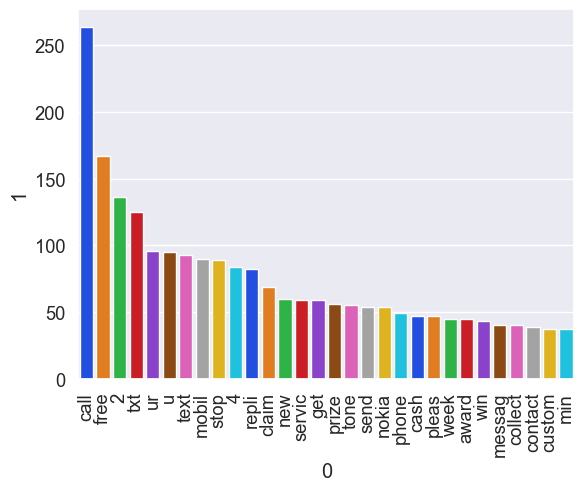

In [60]:
sns.barplot(data = filter_df, x = filter_df[0], y = filter_df[1], palette = 'bright')
plt.xticks(rotation = 90)
plt.show()

Top30 từ phổ biến thuộc nhóm ham

In [61]:
ham_carpos = []
for sentence in df[df['target'] == 0]['transformed_text'].tolist():
    for word in sentence.split():
        ham_carpos.append(word)

In [62]:
filter_ham_df = pd.DataFrame(Counter(ham_carpos).most_common(30))

C:\Users\jayce\AppData\Local\Temp\ipykernel_17620\2318981814.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = filter_ham_df, x = filter_ham_df[0], y = filter_ham_df[1], palette = 'bright')


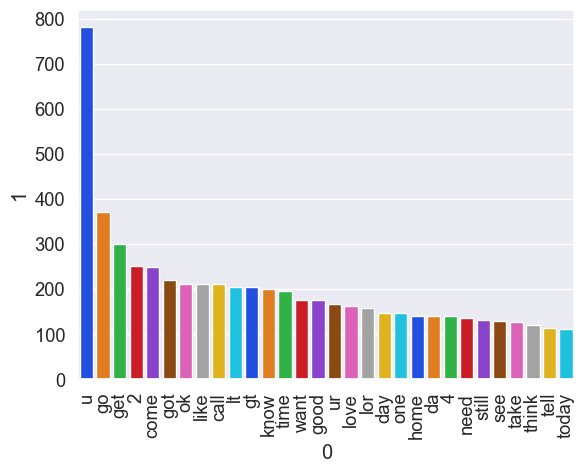

In [63]:
sns.barplot(data = filter_ham_df, x = filter_ham_df[0], y = filter_ham_df[1], palette = 'bright')
plt.xticks(rotation = 90)
plt.show()

### 7 Xây dựng Model

#### 7.1 Khởi tạo CountVectorizer and TfidfVectorizer

* CountVectorizer
    - Chuyển văn bản thành một ma trận từ điển (word count matrix)
    - Mỗi hàng tương ứng với một văn bản trong dữ liệu, và mỗi cột tương ứng với một từ trong từ điển
* TfidfVectorizer
    - Tương tự CountVectorized, nhưng thêm phần tần suất xuất hiện của từ trong văn bản (TF) và tần suất từ xuất hiện trong toàn bộ tài liệu (IDF)

In [64]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfid = TfidfVectorizer(max_features = 3000)

#### 7.2 Khai báo các biến độc lập (X) và biến phụ thuộc (y)

In [65]:
X = tfid.fit_transform(df['transformed_text']).toarray()
y = df['target'].values

* Biến độc lập X (transformed_text): là một mảng 2 chiều, mỗi dòng tương ứng với một văn bản, và mỗi cột là giá trị của một từ (hoặc trọng số TF-IDF của từ đó) trong văn bản
* Biến phụ thuộc y (target): là mảng một chiều chứa nhãn của mỗi văn bản

#### 7.3 Chia dữ liệu cho Model (train/test)

* Tệp huấn luyện 80% dữ liệu
* Tệp kiểm tra gồm 20% dữ liệu

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 2)

#### 7.4 Khai báo các thư viện cho Models

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

#### 7.5 Khởi tạo các mô hình

In [68]:
svc = SVC(kernel= "sigmoid", gamma  = 1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver = 'liblinear', penalty = 'l1')
rfc = RandomForestClassifier(n_estimators = 50, random_state = 2 )
abc = AdaBoostClassifier(n_estimators = 50, random_state = 2)
bc = BaggingClassifier(n_estimators = 50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators = 50, random_state = 2)    
xgb  = XGBClassifier(n_estimators = 50, random_state = 2)

In [69]:
clfs = {
    'SVC': svc,
    'KNN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'Adaboost': abc,
    'Bgc': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb
}

#### 7.6 Hàm huấn luyện Models

In [70]:
from sklearn.metrics import accuracy_score, precision_score
def train_classifier(clfs, X_train, y_train, X_test, y_test):
    clfs.fit(X_train,y_train)
    y_pred = clfs.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy , precision

### 1.8 Đánh giá các Models

In [71]:

from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix

def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)

    return accuracy, precision, f1, cm

accuracy_scores = []
precision_scores = []
f1_scores = []

with open('results.txt', 'w') as f:
    for name, clf in clfs.items():
        acc, prec, f1, cm = train_classifier(clf, X_train, y_train, X_test, y_test)
        
        print()
        print(f"=== {name} ===")
        print("Accuracy: ", acc)
        print("Precision (weighted): ", prec)
        print("F1 Score (weighted): ", f1)
        print("Confusion Matrix:\n", cm)

        accuracy_scores.append(acc)
        precision_scores.append(prec)
        f1_scores.append(f1)


=== SVC ===
Accuracy:  0.9752321981424149
Precision (weighted):  0.9755480349368879
F1 Score (weighted):  0.9739387015724543
Confusion Matrix:
 [[863   1]
 [ 23  82]]

=== KNN ===
Accuracy:  0.9184726522187823
Precision (weighted):  0.9253026209088313
F1 Score (weighted):  0.8956721204537963
Confusion Matrix:
 [[864   0]
 [ 79  26]]

=== NB ===
Accuracy:  0.9731682146542827
Precision (weighted):  0.9735597310416713
F1 Score (weighted):  0.9716209110804357
Confusion Matrix:
 [[863   1]
 [ 25  80]]

=== DT ===
Accuracy:  0.9391124871001032
Precision (weighted):  0.9346685184241612
F1 Score (weighted):  0.9343766348004584
Confusion Matrix:
 [[850  14]
 [ 45  60]]

=== LR ===
Accuracy:  0.9607843137254902
Precision (weighted):  0.9597111949601347
F1 Score (weighted):  0.9583042924174776
Confusion Matrix:
 [[858   6]
 [ 32  73]]

=== RF ===
Accuracy:  0.9762641898864809
Precision (weighted):  0.9762745182296753
F1 Score (weighted):  0.9752126857519495
Confusion Matrix:
 [[862   2]
 [ 21  8

### 1.9 Lưu Models

In [72]:
clfs = {
    'SVC': svc,
    'KNN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'Adaboost': abc,
    'Bgc': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb
    
}

In [73]:
import joblib
import os

os.makedirs("saved_models", exist_ok=True)

for name, clf in clfs.items():
    if name == 'xgb':
        clf.save_model(f"saved_models/{name}_model.json")
    else:
        joblib.dump(clf, f"saved_models/{name}_model.pkl")

joblib.dump(tfid, 'saved_models/tfidf_vectorizer.pkl')  # Save TF-IDF vectorizer


['saved_models/tfidf_vectorizer.pkl']

### 1.10 Sử dụng Models cho đánh giá

In [74]:
import joblib
from xgboost import XGBClassifier

rf_model = joblib.load('saved_models/RF_model.pkl')

tfid = joblib.load('saved_models/tfidf_vectorizer.pkl')


In [75]:
text = ["You have won a lottery worth $1000! Claim now."]

In [76]:
vectorized = tfid.transform(text).toarray()

# Dự đoán
prediction = rf_model.predict(vectorized)
print("Prediction:", prediction[0])

Prediction: 1
